In [2]:
import datetime as dt
from pathlib import Path

import cartopy.crs as ccrs
import dask
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import xarray as xr

from mcs_prime import McsTracks
from mcs_prime.mcs_prime_config import PATHS
from mcs_prime import plotting as mplt

from remake import load_remake

In [3]:
era5_hists = load_remake('../../remakefiles/era5_histograms.py')

In [7]:
paths = [t.outputs['vi_moisture_flux_div'] for t in era5_hists.GenERA5VIMoistureFluxDiv.tasks]

In [8]:
vimfd = xr.open_mfdataset(paths).load()

In [9]:
vimfd

<xarray.Dataset>
Dimensions:                                  (time: 120, latitude: 481,
                                              longitude: 1440)
Coordinates:
  * time                                     (time) datetime64[ns] 2020-01-01...
  * latitude                                 (latitude) float32 60.0 ... -60.0
  * longitude                                (longitude) float32 0.0 ... 359.8
Data variables:
    vertically_integrated_moisture_flux_div  (time, latitude, longitude) float64 ...

(array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 3.0000000e+00, 6.0000000e+00, 6.0000000e+00,
        8.0000000e+00, 4.0000000e+00, 5.0000000e+00, 5.0000000e+00,
        1.2000000e+01, 1.0000000e+01, 1.2000000e+01, 2.1000000e+01,
        2.0000000e+01, 2.1000000e+01, 2.6000000e+01, 3.9000000e+01,
        4.2000000e+01, 4.3000000e+01, 4.8000000e+01, 6.1000000e+01,
        6.8000000e+01, 7.7000000e+01, 9.8000000e+01, 1.2900000e+02,
        1.2000000e+02, 1.3000000e+02, 1.9800000e+02, 2.3000000e+02,
        3.0200000e+02, 3.0800000e+02, 4.0200000e+02, 4.5200000e+02,
        5.0700000e+02, 6.3500000e+02, 7.4600000e+02, 9.6000000e+02,
        1.0580000e+03, 1.4150000e+03, 1.7150000e+03, 2.2060000e+03,
        2.8330000e+03, 3.7040000e+03, 4.7990000e+03, 6.3180000e+03,
        8.3200000e+03, 1.0999000e+04, 1.5246000e

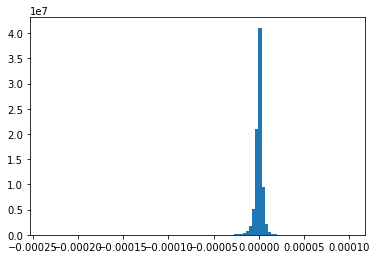

In [12]:
plt.hist(vimfd.vertically_integrated_moisture_flux_div.values.flatten(), bins=100)

In [14]:
np.percentile(vimfd.vertically_integrated_moisture_flux_div.values, [1, 10, 90, 99])

array([-1.42929567e-05, -3.89410776e-06,  3.88032056e-06,  9.91304342e-06])